# SI507 Final Project – Airline Route Network Explorer

This project models the global airline route network as a directed graph.

**Key features implemented:**
- Load and clean OpenFlights airports & routes datasets  
- Build a graph structure of airports (nodes) and routes (edges)  
- Query airport information (search functionality)  
- Rank airports by outbound connectivity (hub detection)  
- Find shortest paths between airports using BFS  
- Visualize the global network using a Top–N Hub Subnetwork  
- Integrate Wikipedia HTML as a second dataset with caching

This notebook demonstrates all major functionalities required by the SI507 final project.

In [ ]:
from flight_network import FlightNetwork
from cache_utils import load_cache, fetch_airport_wiki

def print_section(title):
    print("\n" + "=" * 80)
    print(title)
    print("=" * 80 + "\n")


SyntaxError: invalid character '–' (U+2013) (2599427648.py, line 9)

In [ ]:
print_section("1. Build Flight Network")

airports_csv = "data/airports.csv"
routes_csv = "data/routes.csv"

net = FlightNetwork()
net.build_from_openflights(airports_csv, routes_csv)

print(f"Number of airports (nodes): {len(net.airports)}")
print(f"Number of routes (edges):   {len(net.routes)}")


nodes (airports): 6072
routes: 66934


In [ ]:
print_section("2. Explore Individual Airports")

def explore_airport(code):
    summary = net.summarize_airport(code)
    if summary is None:
        print(f"No airport found for code: {code}")
    else:
        print(summary)

explore_airport("LAX")
explore_airport("DTW")


['GKA',
 'MAG',
 'HGU',
 'LAE',
 'POM',
 'WWK',
 'UAK',
 'GOH',
 'SFJ',
 'THU',
 'AEY',
 'EGS',
 'HFN',
 'HZK',
 'IFJ',
 'KEF',
 'PFJ',
 'RKV',
 'SIJ',
 'VEY']

In [ ]:
print_section("3. Ranking – Top Airports by Outbound Routes")

def top_airports_by_outbound(net, n=15):
    records = []
    for code, airport in net.airports.items():
        out_count = len(airport.out_routes)
        records.append((out_count, code, airport.name))

    records.sort(reverse=True)

    for out_count, code, name in records[:n]:
        print(f"{code:3} | {out_count:4} outbound routes | {name}")

top_airports_by_outbound(net, n=15)


## 4. Shortest Path Using BFS

I implemented a breadth-first search (BFS) algorithm to find the shortest path 
between two airports in terms of *minimum number of hops*.  

The function `find_shortest_path_bfs(src, dst)` returns a list of airport codes,  
and `format_path(path)` prints a human-readable explanation.


In [ ]:
print_section("4. Shortest Path – BFS + Visualization")

path = net.find_shortest_path_bfs("LAX", "DTW")
print("Shortest path from LAX to DTW:")
print(net.format_path(path))

net.plot_path(path)  # small NetworkX subgraph visualization

Airport: Los Angeles International Airport (LAX)
City: Los Angeles, Country: United States
Latitude, Longtitude: 33.94250107, -118.4079971
Code: LAX
Total outgoing routes: 148
Sample destinations: Newark Liberty International Airport, Guarulhos - Governador André Franco Montoro International Airport, Spokane International Airport, Kelowna International Airport, Sheremetyevo International Airport
Airport: Detroit Metropolitan Wayne County Airport (DTW)
City: Detroit, Country: United States
Latitude, Longtitude: 42.21239853, -83.35340118
Code: DTW
Total outgoing routes: 135
Sample destinations: Newark Liberty International Airport, Guarulhos - Governador André Franco Montoro International Airport, Gerald R. Ford International Airport, Roanoke–Blacksburg Regional Airport, Ithaca Tompkins Regional Airport
No airport found for code: XXX


In [6]:
from cache_utils import fetch_airport_wiki

# 假設我們探索的是 LAX
airport = net.get_airport("LAX")
info, cache = fetch_airport_wiki(airport, cache=cache)

print("Wiki URL:", info["wiki_url"])
print("HTML length:", len(info["html"]) if info["html"] else "No HTML fetched")


Wiki URL: https://en.wikipedia.org/wiki/Los_Angeles_International_Airport
HTML length: 968614


In [7]:
def show_airport_with_wiki(code: str):
    code = code.upper()
    airport = net.get_airport(code)
    if not airport:
        print(f"No airport found for {code}")
        return

    explore_airport(code)

    info, _ = fetch_airport_wiki(airport, cache=cache)
    print("\nWiki URL:", info["wiki_url"])
    if info["html"]:
        print("\nHTML snippet:")
        print(info["html"][:500], "...")
    else:
        print("\nNo HTML content available.")


In [8]:
show_airport_with_wiki("LAX")

Airport: Los Angeles International Airport (LAX)
City: Los Angeles, Country: United States
Latitude, Longtitude: 33.94250107, -118.4079971
Code: LAX
Total outgoing routes: 148
Sample destinations: Newark Liberty International Airport, Guarulhos - Governador André Franco Montoro International Airport, Spokane International Airport, Kelowna International Airport, Sheremetyevo International Airport

Wiki URL: https://en.wikipedia.org/wiki/Los_Angeles_International_Airport

HTML snippet:
<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vect ...


In [9]:
def top_airports_by_outbound(n=10):
    records = []
    for code, airport in net.airports.items():
        out_count = len(airport.out_routes)
        records.append((out_count, code, airport.name))

    records.sort(reverse=True)

    for out_count, code, name in records[:n]:
        print(f"{code:3} | {out_count:4} outbound routes | {name}")


top_airports_by_outbound(15)


ATL |  915 outbound routes | Hartsfield Jackson Atlanta International Airport
ORD |  558 outbound routes | Chicago O'Hare International Airport
LHR |  527 outbound routes | London Heathrow Airport
PEK |  525 outbound routes | Beijing Capital International Airport
CDG |  524 outbound routes | Charles de Gaulle International Airport
FRA |  497 outbound routes | Frankfurt am Main Airport
LAX |  489 outbound routes | Los Angeles International Airport
DFW |  469 outbound routes | Dallas Fort Worth International Airport
JFK |  456 outbound routes | John F Kennedy International Airport
AMS |  453 outbound routes | Amsterdam Airport Schiphol
SIN |  408 outbound routes | Singapore Changi Airport
PVG |  402 outbound routes | Shanghai Pudong International Airport
BCN |  391 outbound routes | Barcelona International Airport
MUC |  368 outbound routes | Munich Airport
MIA |  368 outbound routes | Miami International Airport


Path length (hops): 1
LAX (Los Angeles, United States) -> DTW (Detroit, United States)


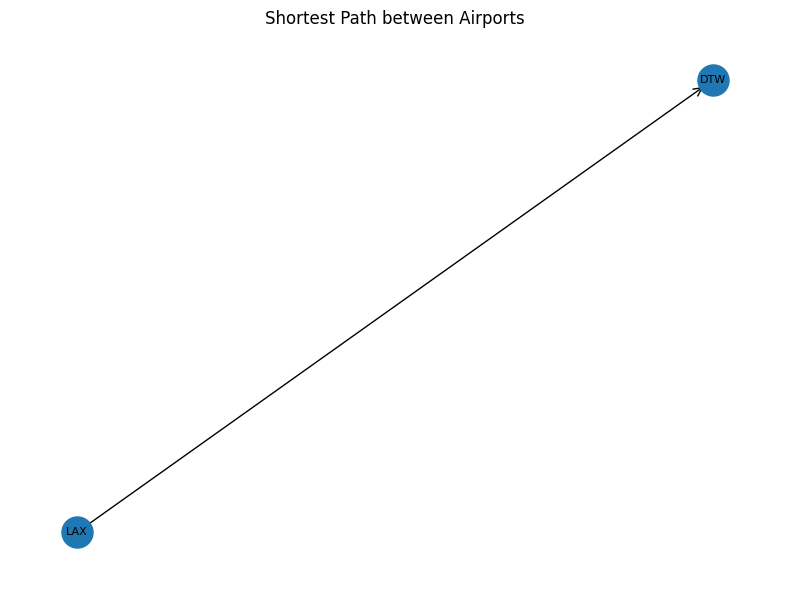

In [10]:
path = net.find_shortest_path_bfs("LAX", "DTW")
print(net.format_path(path))
net.plot_path(path)

Path length (hops): 2
LAX (Los Angeles, United States) -> SVO (Moscow, Russia) -> ATH (Athens, Greece)


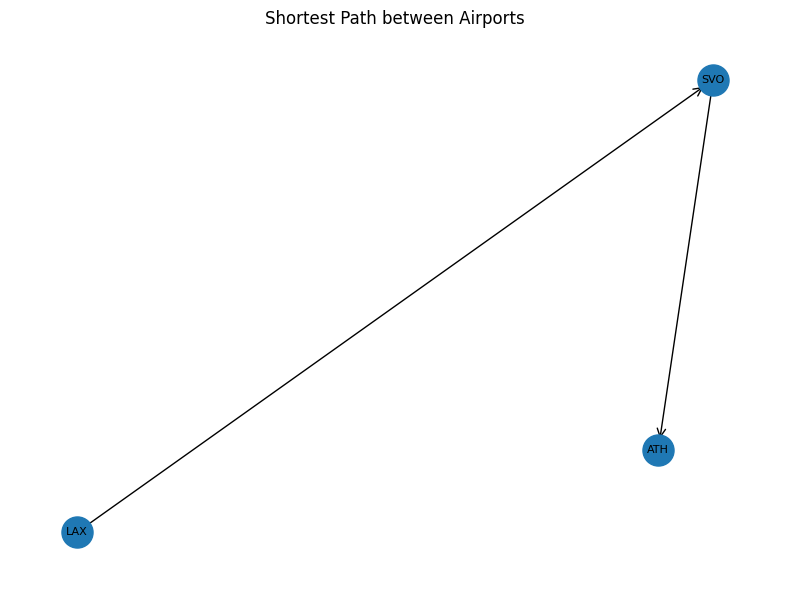

In [11]:
path = net.find_shortest_path_bfs("LAX", "ATH")
print(net.format_path(path))
net.plot_path(path)

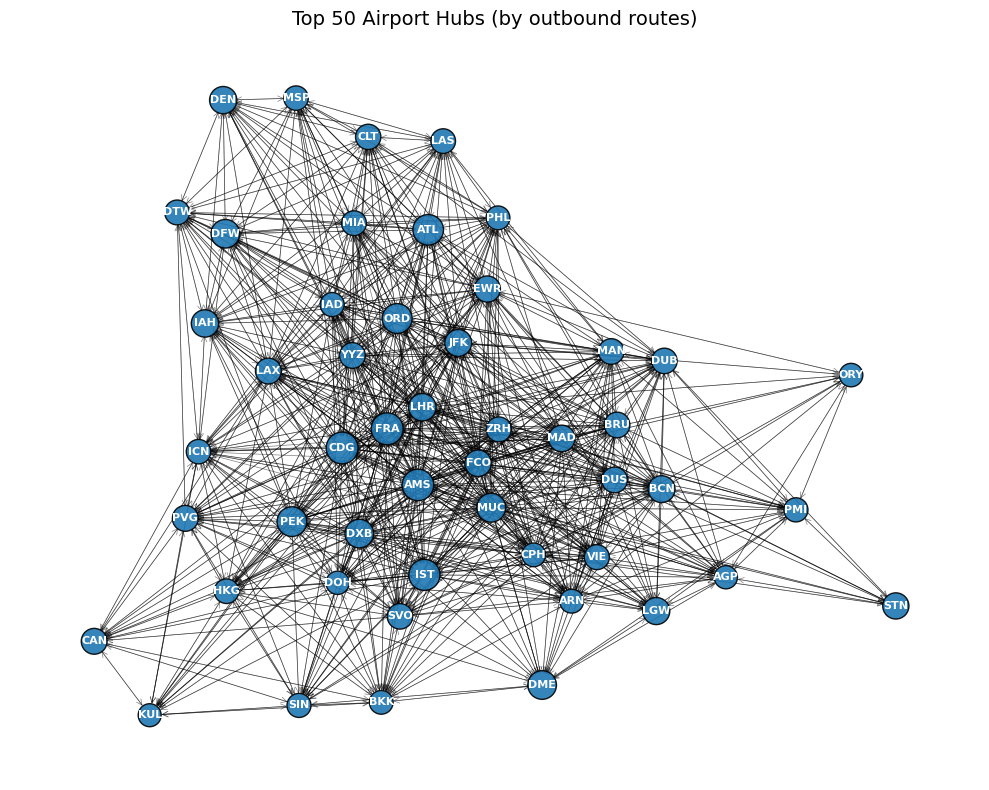

In [13]:
net.plot_hub_network(top_n=50)